In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_df=pd.read_excel("/content/marks_vs_rank.xlsx")

In [3]:
data_df.head(32)

,marks,rank
0,41.253,136070
1,45.283,99667
2,45.455,98560
3,46.322,90856
4,47.170,84353
5,48.983,70147
6,48.120,76847
7,49.665,65399
8,50.520,60078
9,51.064,56824


In [4]:
data_df.corr()

,marks,rank
marks,1.000000,-0.802375
rank,-0.802375,1.000000


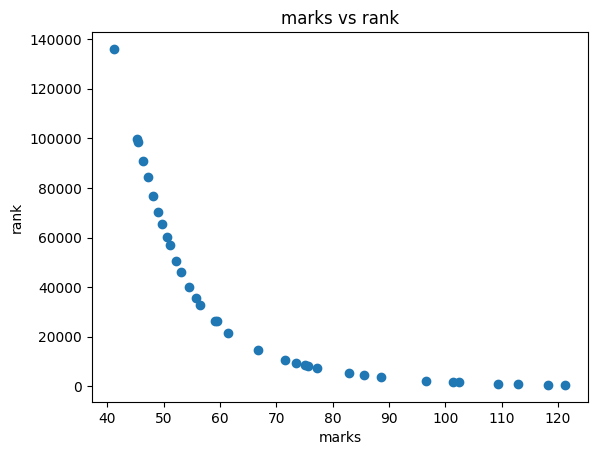

In [5]:
x=data_df['marks'].values.reshape(-1,1)
plt.xlabel("marks")
plt.ylabel("rank")
plt.title("marks vs rank")
y=data_df['rank'].values.reshape(-1,1)
# plt.plot(x,y)
plt.scatter(x,y)
plt.show()

<Axes: >

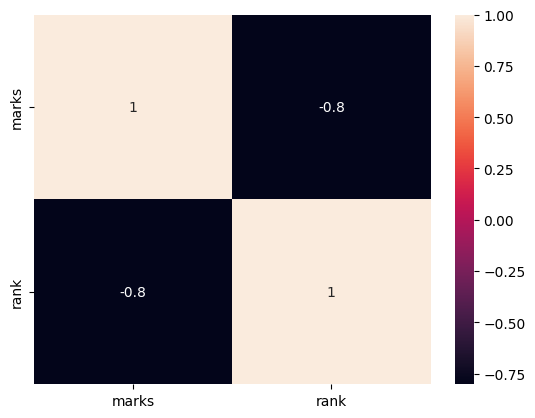

In [6]:
sns.heatmap(data_df.corr(),annot=True)

In [7]:
data_df.describe()

,marks,rank
count,34.00000,34.000000
mean,70.13600,35293.588235
std,23.81238,36639.117219
min,41.25300,562.000000
25%,50.65600,4839.000000
50%,60.42000,23827.500000
75%,84.92575,59264.500000
max,121.29600,136070.000000


In [8]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   marks   34 non-null     float64
 1   rank    34 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 672.0 bytes


In [9]:
data_df['rank']=data_df['rank'].astype(float)

In [10]:
y=data_df['rank'].values.reshape(-1,1)
x=data_df['marks'].values.reshape(-1,1)

In [11]:
print(x)
x.shape

[[ 41.253]
 [ 45.283]
 [ 45.455]
 [ 46.322]
 [ 47.17 ]
 [ 48.983]
 [ 48.12 ]
 [ 49.665]
 [ 50.52 ]
 [ 51.064]
 [ 52.189]
 [ 53.138]
 [ 54.421]
 [ 55.674]
 [ 56.477]
 [ 59.477]
 [ 59.074]
 [ 61.363]
 [ 66.789]
 [ 71.491]
 [ 73.424]
 [ 75.153]
 [ 75.64 ]
 [ 77.207]
 [ 82.864]
 [ 85.613]
 [ 88.614]
 [ 96.601]
 [101.37 ]
 [102.33 ]
 [109.401]
 [112.966]
 [118.217]
 [121.296]]


(34, 1)

In [12]:
print(y)
y.shape

[[136070.]
 [ 99667.]
 [ 98560.]
 [ 90856.]
 [ 84353.]
 [ 70147.]
 [ 76847.]
 [ 65399.]
 [ 60078.]
 [ 56824.]
 [ 50704.]
 [ 46061.]
 [ 40228.]
 [ 35520.]
 [ 32818.]
 [ 26146.]
 [ 26146.]
 [ 21509.]
 [ 14607.]
 [ 10751.]
 [  9496.]
 [  8570.]
 [  8319.]
 [  7555.]
 [  5400.]
 [  4652.]
 [  3822.]
 [  2345.]
 [  1715.]
 [  1620.]
 [  1082.]
 [   879.]
 [   674.]
 [   562.]]


(34, 1)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [15]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(27, 1)
(27, 1)
(7, 1)
(7, 1)


In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
reg=LinearRegression()

In [18]:
model=reg.fit(x_train,y_train)

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
y_pred=model.predict(x_test)

In [21]:
y_pred.shape

(7, 1)

In [22]:
x_test.shape

(7, 1)

In [23]:
from sklearn.metrics import mean_squared_error, r2_score

# Assuming y_test is your actual target values and y_pred is your model's predictions
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Calculate RMSE
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 796041370.8903185
Root Mean Squared Error: 28214.20512597012
R-squared: 0.5951850219278476


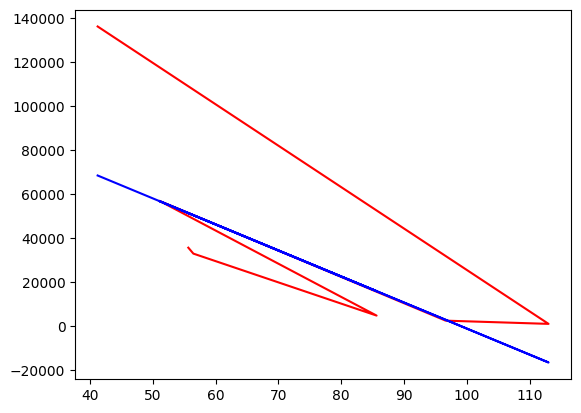

In [24]:
# drawing graph between values
plt.plot(x_test,y_test,color='red')
plt.plot(x_test,y_pred,color='blue')
plt.show()

In [25]:
# using suppoer vector
from sklearn.svm import SVR
model1=SVR()
model1.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [26]:
y_svr_pred=model1.predict(x_test)

In [27]:
mse = mean_squared_error(y_test, y_svr_pred)
rmse = np.sqrt(mse)  # Calculate RMSE
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 2252816663.855718
Root Mean Squared Error: 47463.845860356894
R-squared: 0.5951850219278476


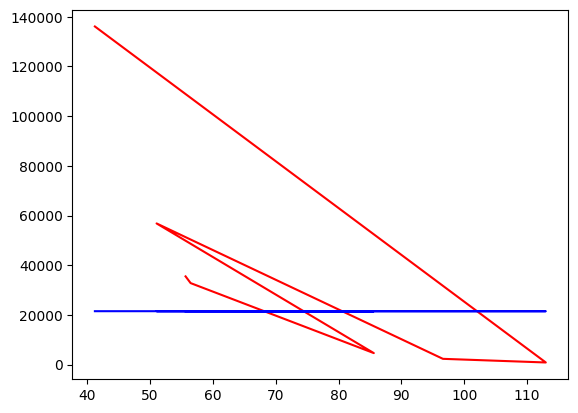

In [28]:
plt.plot(x_test,y_test,color='red')
plt.plot(x_test,y_svr_pred,color='blue')
plt.show()

In [29]:
# using random forest
from sklearn.ensemble import RandomForestRegressor
model2=RandomForestRegressor()
model2.fit(x_train,y_train)

<ipython-input-29-4366add4e094>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model2.fit(x_train,y_train)


RandomForestRegressor()

In [30]:
Y_random_pred=model2.predict(x_test)

In [31]:
mse = mean_squared_error(y_test, Y_random_pred)
rmse = np.sqrt(mse)  # Calculate RMSE
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 207405569.0905714
Root Mean Squared Error: 14401.58217317012
R-squared: 0.5951850219278476


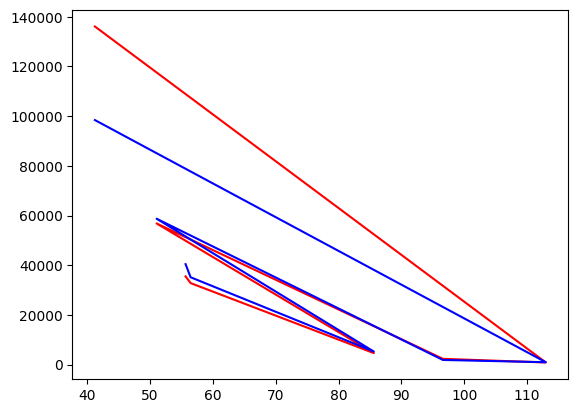

In [32]:
# dawing graph
plt.plot(x_test,y_test,color='red')
plt.plot(x_test,Y_random_pred,color='blue')
plt.show()

In [33]:
print(Y_random_pred)

[40439.25 35168.49  5275.98 58729.01  1894.08   983.69 98415.22]


In [34]:
print(y_test)

[[ 35520.]
 [ 32818.]
 [  4652.]
 [ 56824.]
 [  2345.]
 [   879.]
 [136070.]]


In [35]:
Y_random_pred=Y_random_pred.reshape(-1,1)

In [36]:
print(Y_random_pred)

[[40439.25]
 [35168.49]
 [ 5275.98]
 [58729.01]
 [ 1894.08]
 [  983.69]
 [98415.22]]


In [37]:
from sklearn import tree

In [38]:
model3 = tree.DecisionTreeClassifier()

In [39]:
model3.fit(x_train, y_train)

DecisionTreeClassifier()

In [40]:
Y_desion_tree=model3.predict(x_test)

In [41]:
mse = mean_squared_error(y_test, Y_desion_tree)
rmse = np.sqrt(mse)  # Calculate RMSE
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r2)

Mean Squared Error: 201976843.14285713
Root Mean Squared Error: 14211.85572481149
R-squared: 0.5951850219278476


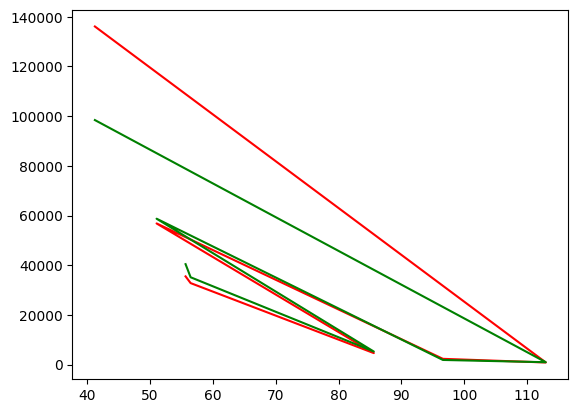

In [42]:
# dawing graph
plt.plot(x_test,y_test,color='red')
plt.plot(x_test,Y_random_pred,color='green')
# plt.plot(x_test,Y_desion_tree,color='blue')
plt.show()

In [43]:
print(Y_desion_tree,"/n/n",Y_random_pred,"/n/n",y_test)

[40228. 40228.  5400. 60078.  1715.  1082. 99667.] /n/n [[40439.25]
 [35168.49]
 [ 5275.98]
 [58729.01]
 [ 1894.08]
 [  983.69]
 [98415.22]] /n/n [[ 35520.]
 [ 32818.]
 [  4652.]
 [ 56824.]
 [  2345.]
 [   879.]
 [136070.]]


In [47]:
print(Y_random_pred)
print(x_test)
print(y_test)

[[40439.25]
 [35168.49]
 [ 5275.98]
 [58729.01]
 [ 1894.08]
 [  983.69]
 [98415.22]]
[[ 55.674]
 [ 56.477]
 [ 85.613]
 [ 51.064]
 [ 96.601]
 [112.966]
 [ 41.253]]
[[ 35520.]
 [ 32818.]
 [  4652.]
 [ 56824.]
 [  2345.]
 [   879.]
 [136070.]]


In [48]:
model3.predict([[100]])

array([1715.])

In [49]:
model3.fit(x,y)

DecisionTreeClassifier()

In [50]:
model3.predict([[100]])

array([1715.])

In [51]:
model3.predict([[47]])

array([84353.])

In [52]:
model3.predict([[54]])

array([40228.])

In [53]:
import pickle

In [54]:
pickle.dump(model3,open('model.pkl','wb'))

In [55]:
marks_vs=pickle.load(open('/content/marks_vs_rank.pkl','rb'))

In [56]:
marks_vs.predict([[41]])

array([136070.])

In [ ]:
x